# **PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS - NÚCLEO DE EDUCAÇÃO A DISTÂNCIA**

### Pós-graduação Lato Sensu em Ciência de Dados e Big Data

# Clusterização do índice de vacinação no estado do Maranhão com base em indicadores Sócio-econômicos

### Aluno: José de Ribamar Mendes Farias

## 5. Criação de Modelos de Machine Learning

Nesta fase usaremos o arquivo RegVacinaMA_AED.csv, criado no notebook TCC_PUC_02 - Vacina_MA - AED.ipynb

## 5.1 Bibliotecas

In [ ]:
#pip install scikit-fuzzy --upgrade

In [1]:
import pandas as pd
from datetime import datetime, date
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch

from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.cluster import KMeans
import skfuzzy

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## 4.2 Carregando a planilha de trabalho

In [2]:
# Carregando a planilha registros da vacinação Covid-19/MA
df_mml = pd.read_csv('RegVacinaMA_AED.csv', encoding='utf-8', sep=',', header=0, low_memory=False)

In [3]:
# Examinando o dataset
df_mml.columns = df_mml.columns.str.replace(' ', '')
df_mml.drop(columns=['Unnamed:0'], axis=1, inplace=True)
df_mml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737003 entries, 0 to 737002
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   paciente_id               737003 non-null  object 
 1   paciente_idade            737003 non-null  float64
 2   paciente_dt_nasc          737003 non-null  object 
 3   paciente_sexo             737003 non-null  object 
 4   paciente_raca             737003 non-null  object 
 5   paciente_nm_municp        737003 non-null  object 
 6   paciente_categoria        736695 non-null  object 
 7   vacina_nm_municp          737003 non-null  object 
 8   vacina_dt_aplic           737003 non-null  object 
 9   vacina_desc_dose          737003 non-null  object 
 10  vacina_nome               737003 non-null  object 
 11  municp_populacao          737003 non-null  int64  
 12  municp_codigo             737003 non-null  int64  
 13  municp_qtdevac            737003 non-null  i

In [4]:
df_mml2 = df_mml.drop(columns=['paciente_id', 'paciente_idade', 'paciente_dt_nasc', 'paciente_sexo','paciente_raca',
                               'paciente_nm_municp','paciente_categoria','vacina_nm_municp','vacina_dt_aplic',
                               'vacina_desc_dose','vacina_nome','paciente_class_idade','paciente_class_idade',
                               'vacina_dose_mes','municp_codigo','municp_mort_inf','municp_tx_analf','municp_domic_agua&esg',
                               'municp_idhm_educ','municp_idhm_longev','municp_idhm_renda','municp_idhm_class_educ',
                               'municp_idhm_class_longev','municp_idhm_class_renda'])

In [5]:
ck_duplic = ['municp_populacao','municp_qtdevac','municp_cobert','municp_nome','municp_idhm']
df_mml2 = df_mml2.drop_duplicates(subset=ck_duplic, keep='first', inplace=False)
df_mml2 = df_mml2.reset_index(drop=True)

In [6]:
df_mml2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   municp_populacao   217 non-null    int64  
 1   municp_qtdevac     217 non-null    int64  
 2   municp_cobert      217 non-null    float64
 3   municp_nome        217 non-null    object 
 4   municp_idhm        217 non-null    float64
 5   municp_idhm_class  217 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 10.3+ KB


In [7]:
df_mmlX = df_mml2.drop(columns=['municp_populacao','municp_qtdevac','municp_nome','municp_idhm_class'])

In [8]:
df_mmlX_bk = df_mmlX.copy

In [9]:
df_mmlX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   municp_cobert  217 non-null    float64
 1   municp_idhm    217 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


## Os métodos de agrupamento de dados podem ser divididos em duas grandes categorias:

   - Métodos Hierárquicos
   - Métodos Posicionais

## 4.3  Algoritmos Hierárquicos

## 4.3.1 Algoritmo Dendrograma

In [ ]:
# Dispersão dos dados

plt.subplots(figsize=(10,8))
plt.scatter(df_mmlX['municp_idhm'], df_mmlX['municp_cobert'], marker='o', c='blue', alpha=0.7)
plt.title('Dispersão dos dados')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice IDHM')

sns.despine()

In [ ]:
schX = sch.linkage(df_mmlX, 'ward')

plt.figure(figsize=(10, 8))
plt.grid(axis='y')
plt.title('Clusters dos dados')
plt.xticks(rotation=90)
denX = sch.dendrogram(schX, labels=list(df_mmlX.index))

In [ ]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
den_cluster = cluster.fit_predict(df_mmlX)
den_cluster

In [ ]:
n_clusters

In [ ]:
mun_nome = list(df_mml2.municp_nome)
mun_group = {i: [] for i in range(n_clusters)}

for mun, grp in zip(mun_nome, den_cluster):
    mun_group[grp].append(mun)

for gp, ctr in mun_group.items():
    print(f'Cluster {gp}: {ctr}\n')

In [ ]:
# Copiando base para a etapa de análise de cluster
df_dend = df_mml2.copy()

In [ ]:
for i in range(len(den_cluster)):
     df_dend['cluster'] = den_cluster

In [ ]:
df_dend.cluster.value_counts()

In [ ]:
# Visualização da quantidade de municípios por cluster

plt.subplots(figsize=(10, 4))
sns.countplot(x=den_cluster, palette = 'Blues')
plt.title('Quantidade de municípios por cluster', fontsize = 14)
plt.xlabel('Clusters')
plt.ylabel('Quantidade')
plt.show()

## 4.4  Algoritmos Particionais

## 4.4.1 Fuzzy C-Means (FCM)

In [ ]:
df_X = df_mmlX[['municp_idhm','municp_cobert']]

In [ ]:
# Dispersão dos dados

plt.subplots(figsize=(10,8))
plt.scatter(df_X['municp_idhm'], df_X['municp_cobert'], marker='o', c='brown', alpha=0.7)
plt.title('Dispersão dos dados')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

sns.despine()

In [ ]:
# Normalizando os valores
f_scaler = StandardScaler()
df_norm = f_scaler.fit_transform(df_X)

In [ ]:
f_fuzzy = skfuzzy.cmeans(data = df_norm.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)
#f_fuzzy

In [ ]:
c0 = f_fuzzy[0]
c0

In [ ]:
c0.shape

In [ ]:
f_cluster1 = f_fuzzy[1]
f_cluster1

In [ ]:
f_cluster1.shape

In [ ]:
tot_cluster = f_cluster1.argmax(axis=0)
tot_cluster

In [ ]:
# Copiando base para a etapa de análise de cluster
df_fuzzy = df_mml2.copy()

In [ ]:
for i in range(len(tot_cluster)):
    df_fuzzy['cluster'] = tot_cluster

In [ ]:
df_fuzzy.cluster.value_counts()

In [ ]:
#plt.figure(figsize=(8, 6))

plt.scatter(df_norm[tot_cluster == 0, 0], df_norm[tot_cluster == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_norm[tot_cluster == 1, 0], df_norm[tot_cluster == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_norm[tot_cluster == 2, 0], df_norm[tot_cluster == 2, 1], s=100, c='green', label='Cluster 3')

plt.title('Algoritmo Fuzzy C-Means\n (Clusters=3)')
plt.xlabel('Cobertura vacinal')
plt.ylabel('Índice de Vacinados')
plt.legend()

In [ ]:
# Visualização da quantidade de municípios por cluster

plt.subplots(figsize=(10, 4))
sns.countplot(x=tot_cluster, palette = 'Blues')
plt.title('Quantidade de municípios por cluster', fontsize = 14)
plt.xlabel('Clusters')
plt.ylabel('Quantidade')
plt.show()

## 4.4.2 Algoritmo K-Means

### 4.4.2.1 Preparando modelo

In [11]:
# Normalizando os valores
#f_scaler = StandardScaler()
#df_norm = f_scaler.fit_transform(df_X)

In [12]:
# Normalizando os valores
df_kmeans = df_mmlX
df_norm = StandardScaler().fit_transform(df_kmeans)

In [14]:
# Testando valores para k
inertias = []
for k in np.arange(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_kmeans)
    inertias.append(kmeans.inertia_)

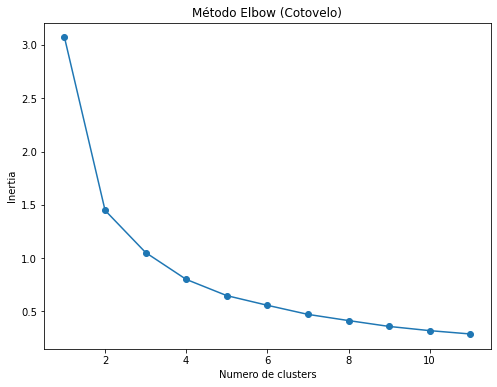

In [15]:
# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 12), inertias, marker='o')
plt.title('Método Elbow (Cotovelo)')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia');

### 4.4.2.2 Aplicando modelo

In [16]:
# Aplicando algoritmo k-means com o número de clusters = 4
nclusters = 4
kmeans = KMeans(n_clusters=nclusters)

df_kmcluster = df_kmeans
df_kmcluster['cluster'] = kmeans.fit_predict(df_kmeans)

kmeans.cluster_centers_
kmeans.labels_

array([1, 1, 0, 1, 3, 3, 3, 0, 1, 1, 2, 1, 2, 3, 3, 3, 1, 1, 2, 3, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 3, 1, 0, 3, 3, 3, 3, 1, 0, 0, 1, 1, 1, 1, 0, 1, 3,
       1, 0, 2, 0, 3, 0, 1, 1, 1, 1, 1, 0, 0, 3, 1, 3, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 0, 3, 1, 0, 2, 0, 2, 1, 1, 1, 3, 1,
       0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 3, 3, 2, 0, 1, 2, 0, 2, 1, 1, 0,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 3, 1, 3, 3, 1, 0, 2,
       2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 3, 3, 2, 3, 3,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 3, 3, 1, 3, 1, 1, 3, 2, 2, 1])

In [18]:
df_kmcluster.cluster.value_counts()

1    91
0    66
3    35
2    25
Name: cluster, dtype: int64

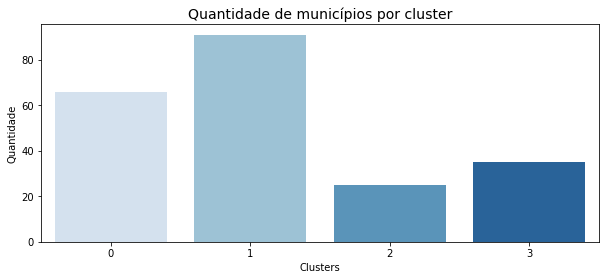

In [19]:
# Visualização da quantidade de municípios por cluster

plt.subplots(figsize=(10, 4))
sns.countplot(x='cluster', data=df_kmcluster, palette = 'Blues')
plt.title('Quantidade de municípios por cluster', fontsize = 14)
plt.xlabel('Clusters')
plt.ylabel('Quantidade')
plt.show()

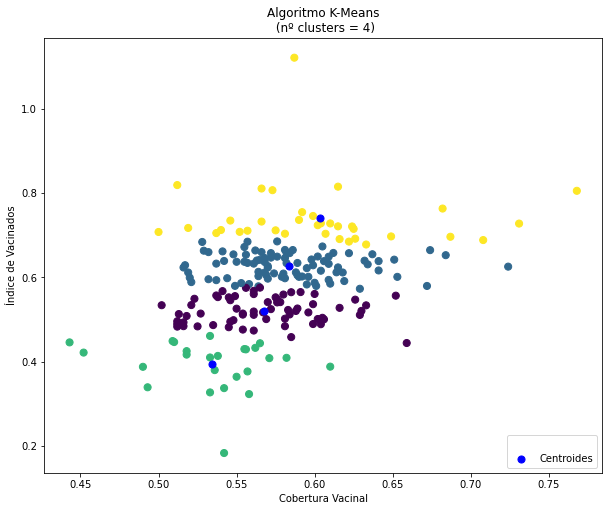

In [20]:
# Visualizando IDHM x cobertura vacinal
plt.subplots(figsize=(10,8))
plt.scatter(df_kmcluster['municp_idhm'], df_kmcluster['municp_cobert'], c=kmeans.labels_, s=50)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0],  c='blue', marker='o', label='Centroides', s = 50)
plt.title('Algoritmo K-Means\n (nº clusters = 4)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')
plt.legend(title=' ', loc=4)
plt.show()

## 4.5 Análise dos Clusters

## 4.5.1 Algoritmo Dendrograma

### 4.5.1.1 Análise Cluster 0

In [ ]:
df_dend_c0 = df_dend[df_dend['cluster'] == 0].sort_values('municp_cobert', ascending=True)
df_dend_c0[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm']].describe().round(2)

In [ ]:
df_class = df_dend_c0[['municp_idhm_class','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

In [ ]:
df_municp = df_dend_c0[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().round(2)
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

In [ ]:
# Distribuição cobertura vacinal
sns.set(style='darkgrid')
plt.scatter(x=df_dend_c0['municp_idhm'].loc[df_dend_c0['cluster'] == 0],
            y=df_dend_c0['municp_cobert'].loc[df_dend_c0['cluster'] == 0], c='red')
plt.title('Algoritmo Dendrograma\n (Cluster 0)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

### 4.5.1.2 Análise Cluster 1

In [ ]:
df_dend_c1 = df_dend[df_dend['cluster'] == 1].sort_values('municp_cobert', ascending=True)
df_dend_c1[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm',]].describe().round(2)

In [ ]:
df_class = df_dend_c1[['municp_idhm_class','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

In [ ]:
df_municp = df_dend_c1[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

In [ ]:
# Distribuição cobertura vacinal
sns.set(style='darkgrid')
plt.scatter(x=df_dend_c1['municp_idhm'].loc[df_dend_c1['cluster'] == 1],
            y=df_dend_c1['municp_cobert'].loc[df_dend_c1['cluster'] == 1], c='blue')
plt.title('Algoritmo Dendrograma\n (Cluster 1)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

### 4.5.1.3 Análise Cluster 2

In [ ]:
df_dend_c2 = df_dend[df_dend['cluster'] == 2].sort_values('municp_cobert', ascending=True)
df_dend_c2[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm',]].describe().round(2)

In [ ]:
df_class = df_dend_c2[['municp_idhm_class','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

In [ ]:
df_municp = df_dend_c2[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

In [ ]:
# Distribuição cobertura vacinal
sns.set(style='darkgrid')
plt.scatter(x=df_dend_c2['municp_idhm'].loc[df_dend_c2['cluster'] == 2],
            y=df_dend_c2['municp_cobert'].loc[df_dend_c2['cluster'] == 2], c='green')
plt.title('Algoritmo Dendrograma\n (Cluster 2)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

In [ ]:
# Distribuição cobertura vacinal
sns.set(style='darkgrid')

plt.scatter(x=df_dend_c0['municp_idhm'].loc[df_dend_c0['cluster'] == 0],
            y=df_dend_c0['municp_cobert'].loc[df_dend_c0['cluster'] == 0], c='red')

plt.scatter(x=df_dend_c1['municp_idhm'].loc[df_dend_c1['cluster'] == 1],
            y=df_dend_c1['municp_cobert'].loc[df_dend_c1['cluster'] == 1], c='blue')

plt.scatter(x=df_dend_c2['municp_idhm'].loc[df_dend_c2['cluster'] == 2],
            y=df_dend_c2['municp_cobert'].loc[df_dend_c2['cluster'] == 2], c='green')

plt.title('Algoritmo Dendrograma\n (Qtde. Clusters = 3)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

## 4.5.2 Algoritmo Fuzzy k-means

### 4.5.2.1 Análise Cluster 0

In [ ]:
df_fuzzy_c0 = df_fuzzy[df_fuzzy['cluster'] == 0].sort_values('municp_cobert', ascending=True)
df_fuzzy_c0[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm',]].describe().round(2)

In [ ]:
df_class = df_fuzzy_c0[['municp_idhm_class','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

In [ ]:
df_municp = df_fuzzy_c0[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

In [ ]:
#plt.figure(figsize=(8, 6))

plt.scatter(df_norm[tot_cluster == 0, 0], df_norm[tot_cluster == 0, 1], s=100, c='red', label='Cluster 0')

plt.title('Algoritmo Fuzzy C-Means\n (Cluster 0)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

plt.legend()


### 4.5.2.2 Análise Cluster 1

In [ ]:
df_fuzzy_c1 = df_fuzzy[df_fuzzy['cluster'] == 1].sort_values('municp_cobert', ascending=True)
df_fuzzy_c1[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm',]].describe().round(2)

In [ ]:
df_class = df_fuzzy_c1[['municp_idhm_class','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

In [ ]:
df_municp = df_fuzzy_c1[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

In [ ]:
#plt.figure(figsize=(8, 6))

plt.scatter(df_norm[tot_cluster == 1, 0], df_norm[tot_cluster == 1, 1], s=100, c='blue', label='Cluster 1')

plt.title('Algoritmo Fuzzy C-Means\n (Cluster 1)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

plt.legend()

### 4.5.2.3 Análise Cluster 2

In [ ]:
df_fuzzy_c2 = df_fuzzy[df_fuzzy['cluster'] == 2].sort_values('municp_cobert', ascending=True)
df_fuzzy_c2[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm',]].describe().round(2)

In [ ]:
df_class = df_fuzzy_c2[['municp_idhm_class','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

In [ ]:
df_municp = df_fuzzy_c2[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

In [ ]:
#plt.figure(figsize=(8, 6))

plt.scatter(df_norm[tot_cluster == 2, 0], df_norm[tot_cluster == 2, 1], s=100, c='green', label='Cluster 2')

plt.title('Algoritmo Fuzzy C-Means\n (Cluster 2)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

plt.legend()

In [ ]:
#plt.figure(figsize=(8, 6))

plt.scatter(df_norm[tot_cluster == 0, 0], df_norm[tot_cluster == 0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(df_norm[tot_cluster == 1, 0], df_norm[tot_cluster == 1, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(df_norm[tot_cluster == 2, 0], df_norm[tot_cluster == 2, 1], s=100, c='green', label='Cluster 2')

plt.title('Algoritmo Fuzzy C-Means\n (Qtde. Cluster=3)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

plt.legend()

## 4.5.3 Algoritmo K-Means

### 4.5.3.1 Análise Cluster 0

In [62]:

df_kmc0 = df_kmcluster[df_kmcluster['cluster'] == 0].sort_values(by=['municp_cobert'], ascending=True)

df_kmc0['municp_populacao'] = df_mml2['municp_populacao']
df_kmc0['municp_qtdevac'] = df_mml2['municp_qtdevac']
df_kmc0['municp_nome'] = df_mml2['municp_nome']
df_kmc0['municp_idhm_class'] = df_mml2['municp_idhm_class']

df_kmc0[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm',]].describe().round(2)

,municp_populacao,municp_qtdevac,municp_cobert,municp_idhm
count,66.00,66.00,66.00,66.00
mean,23473.14,12222.77,0.52,0.57
std,14265.51,7536.36,0.03,0.04
min,6261.00,3320.00,0.44,0.50
25%,13942.75,6709.50,0.50,0.55
50%,19614.50,10517.00,0.52,0.57
75%,29216.50,15952.25,0.55,0.59
max,73105.00,38436.00,0.58,0.66


In [63]:
df_class = df_kmc0[['municp_idhm_class','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

,municp_cobert,municp_populacao,municp_qtdevac,nº de municípios
municp_idhm_class,,,,
Baixo,0.52,22726.82,11895.45,55
Médio,0.51,27204.73,13859.36,11


In [64]:
df_municp = df_kmc0[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

,municp_cobert,municp_populacao,municp_qtdevac
municp_nome,,,
ALDEIAS ALTAS,0.513029,26979,13841
ALTO ALEGRE DO MARANHÃO,0.511687,28066,14361
ARAME,0.495963,32825,16280
ARARI,0.547178,30014,16423
BACABEIRA,0.510891,17446,8913


Text(0, 0.5, 'Índice de Vacinados')

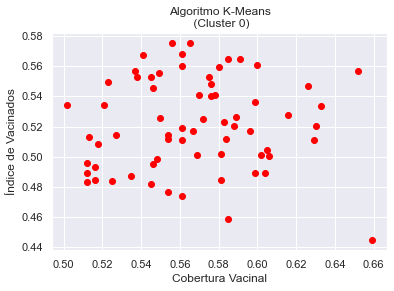

In [65]:
# Distribuição cobertura vacinal
sns.set(style='darkgrid')
plt.scatter(x=df_kmcluster['municp_idhm'].loc[df_kmcluster['cluster'] == 0],
            y=df_kmcluster['municp_cobert'].loc[df_kmcluster['cluster'] == 0], c='red')

plt.title('Algoritmo K-Means\n (Cluster 0)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')


### 4.5.3.2 Análise Cluster 1

In [66]:
df_kmc1 = df_kmcluster[df_kmcluster['cluster'] == 1].sort_values(by=['municp_cobert'], ascending=True)

df_kmc1['municp_populacao'] = df_mml2['municp_populacao']
df_kmc1['municp_qtdevac'] = df_mml2['municp_qtdevac']
df_kmc1['municp_nome'] = df_mml2['municp_nome']
df_kmc1['municp_idhm_class'] = df_mml2['municp_idhm_class']

df_kmc1[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm',]].describe().round(2)

,municp_populacao,municp_qtdevac,municp_cobert,municp_idhm
count,91.00,91.00,91.00,91.00
mean,28622.32,17906.37,0.63,0.58
std,27271.43,17011.06,0.03,0.04
min,4682.00,2760.00,0.57,0.52
25%,11231.00,7047.00,0.60,0.56
50%,19616.00,12420.00,0.63,0.58
75%,32757.50,20622.50,0.65,0.61
max,125265.00,78359.00,0.69,0.72


In [67]:
df_class = df_kmc1[['municp_idhm_class','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

,municp_cobert,municp_populacao,municp_qtdevac,nº de municípios
municp_idhm_class,,,,
Alto,0.63,125265.00,78359.00,1
Baixo,0.63,21627.48,13531.00,64
Médio,0.63,42123.35,26351.42,26


In [68]:
df_municp = df_kmc1[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

,municp_cobert,municp_populacao,municp_qtdevac
municp_nome,,,
AFONSO CUNHA,0.663399,6631,4399
ALTAMIRA DO MARANHÃO,0.579879,8250,4784
ALTO ALEGRE DO PINDARÉ,0.584165,31967,18674
AMAPÁ DO MARANHÃO,0.599404,7047,4224
ANAJATUBA,0.645970,27170,17551


Text(0, 0.5, 'Índice de Vacinados')

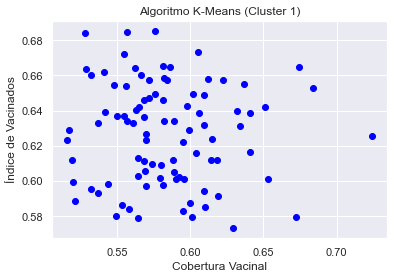

In [69]:
# Distribuição cobertura vacinal
sns.set(style='darkgrid')
plt.scatter(x=df_kmcluster['municp_idhm'].loc[df_kmcluster['cluster'] == 1],
            y=df_kmcluster['municp_cobert'].loc[df_kmcluster['cluster'] == 1], c='blue')

plt.title('Algoritmo K-Means (Cluster 1)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

### 4.5.3.3 Análise Cluster 2

In [70]:
df_kmc2 = df_kmcluster[df_kmcluster['cluster'] == 2].sort_values(by=['municp_cobert'], ascending=True)

df_kmc2['municp_populacao'] = df_mml2['municp_populacao']
df_kmc2['municp_qtdevac'] = df_mml2['municp_qtdevac']
df_kmc2['municp_nome'] = df_mml2['municp_nome']
df_kmc2['municp_idhm_class'] = df_mml2['municp_idhm_class']

df_kmc2[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm',]].describe().round(2)

,municp_populacao,municp_qtdevac,municp_cobert,municp_idhm
count,25.00,25.00,25.00,25.00
mean,24720.76,9468.28,0.39,0.53
std,15969.46,6142.11,0.06,0.04
min,7757.00,3270.00,0.18,0.44
25%,15675.00,6102.00,0.38,0.52
50%,17123.00,7079.00,0.41,0.54
75%,29121.00,10589.00,0.43,0.56
max,73595.00,31587.00,0.46,0.61


In [71]:
df_class = df_kmc2[['municp_idhm_class','municp_cobert','municp_populacao',
                        'municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

,municp_cobert,municp_populacao,municp_qtdevac,nº de municípios
municp_idhm_class,,,,
Baixo,0.39,26959.25,10297.15,20
Muito Baixo,0.40,12428.25,4864.75,4
Médio,0.39,29121.00,11305.00,1


In [72]:
df_municp = df_kmc2[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

,municp_cobert,municp_populacao,municp_qtdevac
municp_nome,,,
AMARANTE DO MARANHÃO,0.429874,42017,18062
ARAGUANÃ,0.409952,15675,6426
BOM JARDIM,0.413663,42010,17378
BOM JESUS DAS SELVAS,0.323066,35095,11338
BOM LUGAR,0.432803,16578,7175


Text(0, 0.5, 'Índice de Vacinados')

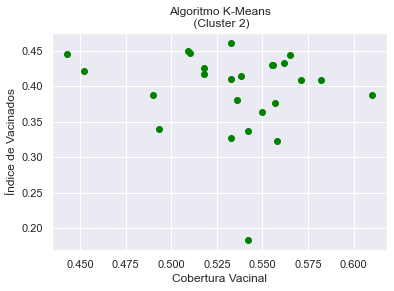

In [73]:
# Distribuição cobertura vacinal
sns.set(style='darkgrid')
plt.scatter(x=df_kmcluster['municp_idhm'].loc[df_kmcluster['cluster'] == 2],
            y=df_kmcluster['municp_cobert'].loc[df_kmcluster['cluster'] == 2], c='green')

plt.title('Algoritmo K-Means\n (Cluster 2)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

### 4.5.3.4 Análise Cluster 3

In [74]:
df_kmc3 = df_kmcluster[df_kmcluster['cluster'] == 3].sort_values(by=['municp_cobert'], ascending=True)

df_kmc3['municp_populacao'] = df_mml2['municp_populacao']
df_kmc3['municp_qtdevac'] = df_mml2['municp_qtdevac']
df_kmc3['municp_nome'] = df_mml2['municp_nome']
df_kmc3['municp_idhm_class'] = df_mml2['municp_idhm_class']

df_kmc3[['municp_populacao','municp_qtdevac','municp_cobert','municp_idhm',]].describe().round(2)

,municp_populacao,municp_qtdevac,municp_cobert,municp_idhm
count,35.00,35.00,35.00,35.00
mean,68039.57,51748.57,0.74,0.60
std,192264.54,153652.20,0.08,0.06
min,4334.00,3069.00,0.68,0.50
25%,8952.50,6448.00,0.70,0.57
50%,12662.00,9011.00,0.72,0.60
75%,24094.50,19553.50,0.74,0.62
max,1115932.00,898898.00,1.12,0.77


In [75]:
df_class = df_kmc3[['municp_idhm_class','municp_cobert','municp_populacao',
                        'municp_qtdevac']].groupby(['municp_idhm_class'])
relat = df_class.mean().round(2)
relat['nº de municípios'] = df_class['municp_qtdevac'].count()
relat.head()

,municp_cobert,municp_populacao,municp_qtdevac,nº de municípios
municp_idhm_class,,,,
Alto,0.74,518752.33,404098.67,3
Baixo,0.76,11084.75,8549.00,16
Muito Baixo,0.71,12731.00,9011.00,1
Médio,0.72,42336.07,30207.27,15


In [76]:
df_municp = df_kmc3[['municp_nome','municp_cobert','municp_populacao','municp_qtdevac']].groupby(['municp_nome'])
relat = df_municp.mean().sort_values('municp_nome', ascending=True)
relat.head()

,municp_cobert,municp_populacao,municp_qtdevac
municp_nome,,,
ALCÂNTARA,0.807014,22126,17856
ALTO PARNAÍBA,0.678091,11233,7617
BALSAS,0.696455,96951,67522
BARÃO DE GRAJAÚ,0.754862,19026,14362
BELÁGUA,0.819141,7586,6214


Text(0, 0.5, 'Índice de Vacinados')

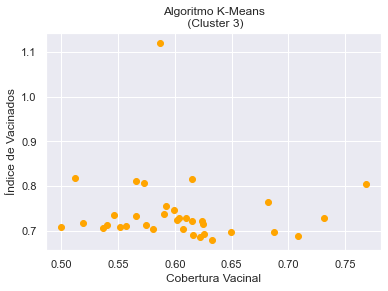

In [77]:
# Distribuição cobertura vacinal
sns.set(style='darkgrid')
plt.scatter(x=df_kmcluster['municp_idhm'].loc[df_kmcluster['cluster'] == 3],
            y=df_kmcluster['municp_cobert'].loc[df_kmcluster['cluster'] == 3], c='orange')

plt.title('Algoritmo K-Means\n (Cluster 3)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

Text(0, 0.5, 'Índice de Vacinados')

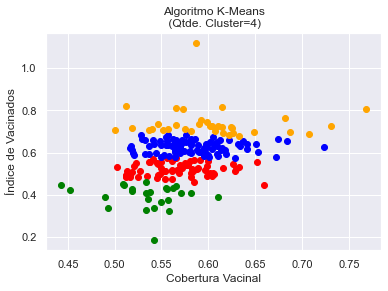

In [78]:
# Distribuição cobertura vacinal
sns.set(style='darkgrid')

plt.scatter(x=df_kmcluster['municp_idhm'].loc[df_kmcluster['cluster'] == 0],
            y=df_kmcluster['municp_cobert'].loc[df_kmcluster['cluster'] == 0], c='red')

plt.scatter(x=df_kmcluster['municp_idhm'].loc[df_kmcluster['cluster'] == 1],
            y=df_kmcluster['municp_cobert'].loc[df_kmcluster['cluster'] == 1], c='blue')

plt.scatter(x=df_kmcluster['municp_idhm'].loc[df_kmcluster['cluster'] == 2],
            y=df_kmcluster['municp_cobert'].loc[df_kmcluster['cluster'] == 2], c='green')

plt.scatter(x=df_kmcluster['municp_idhm'].loc[df_kmcluster['cluster'] == 3],
            y=df_kmcluster['municp_cobert'].loc[df_kmcluster['cluster'] == 3], c='orange')

plt.title('Algoritmo K-Means\n (Qtde. Cluster=4)')
plt.xlabel('Cobertura Vacinal')
plt.ylabel('Índice de Vacinados')

In [83]:
# Análise univariada IDHM longevidade

#plt.subplots(figsize=(10,8))

sns.set_theme(style="ticks")

df = sns.load_dataset('df_mmlX')
sns.pairplot(df, hue='municp_cobert')

#sns.pairplot(data=df_mmlX)

#plt.title('IDHM Longevidade')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
#plt.show()

ValueError: 'df_mmlX' is not one of the example datasets.